                                                😁  Bem vindo! 😁

#### Meu nome é Luis Trindade e sócio fundador da empresa Iteratec Desenvolvimento de Software!

#### Este notebook é material complementar para o curso disponível no youtube: https://www.youtube.com/playlist?list=PLhJbeYspP-A-Dj8Te8dUtf5Q9dprQuZk8

# Criando nossa base de dados 📖

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFile
from random import random
import shutil

def build_dir(list_of_folders):
    for item in path:
        try:
            os.listdir(f'images/{item}')
        except:
            os.mkdir(f'images/{item}')

def create_dataset():
    for file in os.listdir('images'):
        print(file)
        if(file.endswith(".png")):
            im=Image.open('images/' + file)
            rgb_im = im.convert('RGB')
            imResize = rgb_im.resize((256,256), Image.ANTIALIAS)
            imResize.save('images/mod_'+file)  
            rand=random()
            if(rand<=0.85):
                shutil.move('images/mod_' + file,'images/train/' + file)
            else:
                shutil.move('images/mod_' + file,'images/test/' + file)


In [2]:
path=['train','test']
build_dir(path)

In [3]:
create_dataset()

COVID-1.png
COVID-10.png
COVID-100.png
COVID-1000.png
COVID-1001.png
COVID-1002.png
COVID-1003.png
COVID-1004.png
COVID-1005.png
COVID-1006.png
COVID-1007.png
COVID-1008.png
COVID-1009.png
COVID-101.png
COVID-1010.png
COVID-1011.png
COVID-1012.png
COVID-1013.png
COVID-1014.png
COVID-1015.png
COVID-1016.png
COVID-1017.png
COVID-1018.png
COVID-1019.png
COVID-102.png
COVID-1020.png
COVID-1021.png
COVID-1022.png
COVID-1023.png
COVID-1024.png
COVID-1025.png
COVID-1026.png
COVID-1027.png
COVID-1028.png
COVID-1029.png
COVID-103.png
COVID-1030.png
COVID-1031.png
COVID-1032.png
COVID-1033.png
COVID-1034.png
COVID-1035.png
COVID-1036.png
COVID-1037.png
COVID-1038.png
COVID-1039.png
COVID-104.png
COVID-1040.png
COVID-1041.png
COVID-1042.png
COVID-1043.png
COVID-1044.png
COVID-1045.png
COVID-1046.png
COVID-1047.png
COVID-1048.png
COVID-1049.png
COVID-105.png
COVID-1050.png
COVID-1051.png
COVID-1052.png
COVID-1053.png
COVID-1054.png
COVID-1055.png
COVID-1056.png
COVID-1057.png
COVID-1058.png
COVID-

# Preparando nosso dataset 📊

### Funções Auxiliares 🧪

In [12]:
#Importando nossos pacotes e funções:

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import math
import json
import pandas as pd
import numpy as np
from sklearn.utils import shuffle


#Preprocessor - One hot encoder --> Transforma uma variável discreta em múltiplas variáveis binárias.
def preprocessor_disease(df):
    
    categories=df.Disease.unique()
    ohe = OneHotEncoder(drop='if_binary', sparse = False)
    ohe.fit(df[['Disease']]) # Fit encoder
    diseases_encoaded = ohe.transform(df[['Disease']])
    categories.sort()
    for index,item in enumerate(categories):
        df[item]=diseases_encoaded[:,index]    
    return df

#Create csv file --> Cria um arquivo do tipo .csv contendo o nome do arquivo com e sem extensão e a doença presente
#no título do arquivo.
def create_data_csv(path, folder):
    list_images=[]
    for file in os.listdir(path):
        list_images.append({"filename":os.path.splitext(file)[0],"Disease":(os.path.splitext(file)[0]).split("-")[0]})
    df=pd.DataFrame(list_images)
    df=preprocessor_disease(df)
    try:
        df.drop(index=df.loc[df['filename']==folder+'_df'].index[0],inplace=True)
        df.drop(columns=folder+'_df',inplace=True)
    except:
        pass
    df.to_csv(path+ '/' + folder + '_df.csv', index=False)
    
#Plot distribution --> Cria um gráfico de barras contendo as categorias, ou, doenças, no eixo X
#e a contagem de ocorrências no eixo Y.    
def plot_dist(df,categories,position,reference):  
    x_axis=[]
    y_axis=[]
    for index,item in enumerate(categories):
        x_axis.append(item)
        y_axis.append(df.loc[df[item]==1].count()[0])
    sns.set_theme(style="whitegrid")
    sns.barplot(x=x_axis,y=y_axis,ax=axs[position]).set(title=reference)
    sns.lineplot(x=x_axis,y=np.average(y_axis),ax=axs[position])

### Processamento principal🔥

In [13]:
#Definindo o caminho das pastas train e test.
path=['images/train','images/test']
folder=['train','test']

#Criando arquivos do tipo .csv utilizando a função definida nas funções auxiliares.
for index,item in enumerate(path):
    create_data_csv(path[index],folder[index])
    
#Transformando o conteúdo do arquivo .csv em um Pandas DataFrame.
train_df=pd.read_csv(path[0]+ '/' + folder[0] + '_df.csv')
test_df=pd.read_csv(path[1]+ '/' + folder[1] + '_df.csv')

#Definindo uma porcentagem aproximada do DataFrame que será utilizada no treinamento.
n=0.1 #Para trabalharmos apenas com 10% do dataset

#Realizando a abertura das imagens e transformando as mesmas em uma lista de matrizes.
X_train=[]
Y_train=[]
for file in os.listdir('images/train'):
    rand=random()
    if(rand<=0.1):
        if(file.endswith(".png")):
            im=Image.open('images/train/' + file)
            X_train.append(np.asarray(im))
            im_row=train_df[train_df['filename']==os.path.splitext(file)[0]].drop(columns="filename")
            Y_train.append(im_row.drop(columns='Disease').to_numpy()[0])

#Transformando a lista de matrizes em uma estrutura do tipo Numpy Array.
X_train=np.asarray(X_train)
#Normalizando as matrizes que compõem a imagem cujos valores encontram-se entre 0 e 255 para o intervalo de 0 e 1.
X_train=X_train/255
#Transformando nossa lista de listas em uma estrutura do tipo Numpy Array.
Y_train=np.asarray(Y_train)

#Embaralhando nosso ambiente de treinamento de forma a garantir que as doenças estejam distribuidas ao acaso.
X_train, Y_train = shuffle(X_train, Y_train)
#Separando nosso ambiente de treinamento do ambiente de validação em 70% dos dados para treinamento e 30% para validação.
div=math.floor(len(X_train)*0.7)
X_tr = X_train[:div]
y_tr = Y_train[:div]
X_val = X_train[div:]
y_val = Y_train[div:]

# Avaliando nosso dataset 🔍 

### Funções Auxiliares 🧪

In [14]:
#Plot distribution --> Cria um gráfico de barras contendo as categorias, ou, doenças, no eixo X
#e a contagem de ocorrências no eixo Y.    
def plot_dist(df,categories,position,reference):  
    x_axis=[]
    y_axis=[]
    for index,item in enumerate(categories):
        x_axis.append(item)
        y_axis.append(df.loc[df[item]==1].count()[0])
    sns.set_theme(style="whitegrid")
    sns.barplot(x=x_axis,y=y_axis,ax=axs[position]).set(title=reference)
    sns.lineplot(x=x_axis,y=np.average(y_axis),ax=axs[position])

### Processamento principal🔥

(1769, 256, 256, 3)
(1769, 4)
Nosso baseline para a nova amostragem é de aproximadamente 50%.


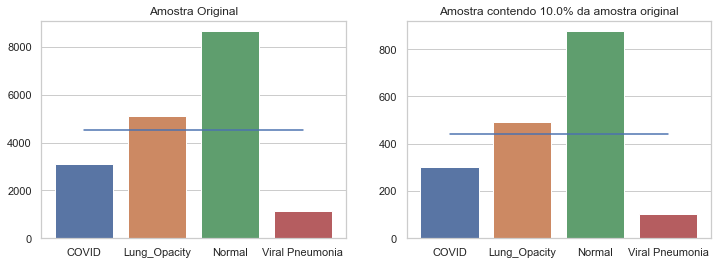

In [15]:
print(X_train.shape)
print(Y_train.shape)

f, axs = plt.subplots(1,2,figsize=(12,4))    
categories=['COVID','Lung_Opacity','Normal','Viral Pneumonia']
plot_dist(train_df,categories,0,'Amostra Original')
train_df=pd.DataFrame(Y_train,columns=['COVID','Lung_Opacity','Normal','Viral Pneumonia'])
plot_dist(train_df,categories,1,'Amostra contendo '+str(n*100)+'% da amostra original')

print(f"Nosso baseline para a nova amostragem é de aproximadamente {str(round(train_df.loc[train_df['Normal']==1].count()[0]/len(X_train)*100))}%.")
plt.show()

# Definindo nosso modelo 🤖

### Funções Auxiliares 🧪

In [16]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

#Funções Auxiliares
def initialize_model():
    
    model = Sequential()
    model.add(Conv2D(16, (2, 2), activation='relu', padding='same', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2)))  
    model.add(Conv2D(16, (2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))  
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    return model

def compile_model(model):
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = adam,
                  metrics = metrics)
    return model

#Procedimento Principal - Definindo o modelo


### Processamento principal🔥

In [17]:
try:
    os.listdir('models')
    for file in os.listdir('models'):
        os.remove('models/'+file)
except:
    os.mkdir(f'models')

metrics=['accuracy']

Learning_rate=0.01

adam = Adam(learning_rate = Learning_rate)

model= initialize_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 16)      208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 16)      1040      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8388736   
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

# Treinando nosso modelo 🦾

### Processamento principal🔥

In [19]:
model_checkpoint=ModelCheckpoint('models/model{epoch:02d}.h5',save_weights_only=True)

model = compile_model(model)

history = model.fit(x=X_tr, y=y_tr, 
                    validation_data=(X_val,y_val),
                    use_multiprocessing=True,                    
                    batch_size=16,
                    epochs = 50, 
                    callbacks = [model_checkpoint])

Epoch 1/50
78/78 [==============================] - 4s 45ms/step - loss: 3.5366 - accuracy: 0.4822 - val_loss: 1.0791 - val_accuracy: 0.5122
Epoch 2/50
78/78 [==============================] - 3s 41ms/step - loss: 0.9262 - accuracy: 0.6034 - val_loss: 0.8856 - val_accuracy: 0.6121
Epoch 3/50
78/78 [==============================] - 3s 40ms/step - loss: 0.7990 - accuracy: 0.6656 - val_loss: 0.8929 - val_accuracy: 0.6441
Epoch 4/50
78/78 [==============================] - 3s 43ms/step - loss: 0.5391 - accuracy: 0.7811 - val_loss: 0.9257 - val_accuracy: 0.6460
Epoch 5/50
78/78 [==============================] - 3s 44ms/step - loss: 0.2900 - accuracy: 0.8942 - val_loss: 1.1362 - val_accuracy: 0.6347
Epoch 6/50
78/78 [==============================] - 3s 43ms/step - loss: 0.1120 - accuracy: 0.9653 - val_loss: 1.4673 - val_accuracy: 0.6497
Epoch 7/50
78/78 [==============================] - 3s 40ms/step - loss: 0.0347 - accuracy: 0.9903 - val_loss: 1.6203 - val_accuracy: 0.6384
Epoch 8/50
78

# Avaliando a performance do nosso modelo 📈

### Funções Auxiliares 🧪

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Funções Auxiliares
def plot_loss_accuracy_curve(history):
    
    fig, ax =plt.subplots(1,2,figsize=(20,5))
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Val'], loc='upper right')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy', fontsize = 18)
    ax[1].set_xlabel('Epoch', fontsize = 14)
    ax[1].set_ylabel('Precision', fontsize = 14)
    ax[1].legend(['Train', 'Val'], loc='lower right')  
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)    
    
    plt.show()

def plot_confusion_matrix(X,y,model):
    Y_pred=model.predict(X)
    Y_pred_cat=[]
    Y_cat=[]
    for item in Y_pred:
        Y_pred_cat.append(np.argmax(item))
    for item in y:
        Y_cat.append(np.argmax(item))
    
    cm = confusion_matrix(Y_cat, Y_pred_cat,normalize='true')
    cm_2 = confusion_matrix(Y_cat, Y_pred_cat)
    
    cm_df = pd.DataFrame(cm,
                     index = categories, 
                     columns = categories)

    cm2_df = pd.DataFrame(cm_2,
                     index = categories, 
                     columns = categories)
    
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_df, annot=True)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm2_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print(classification_report(Y_cat,Y_pred_cat))

### Processamento principal🔥

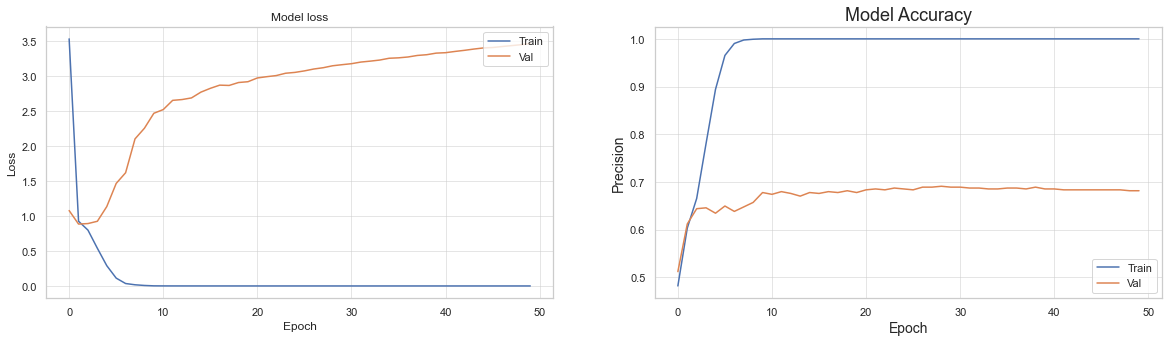

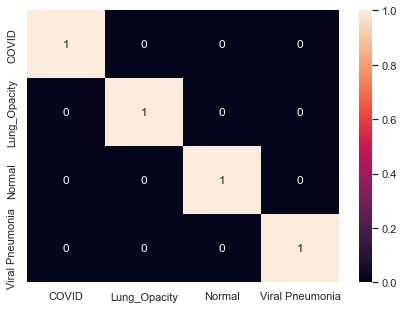

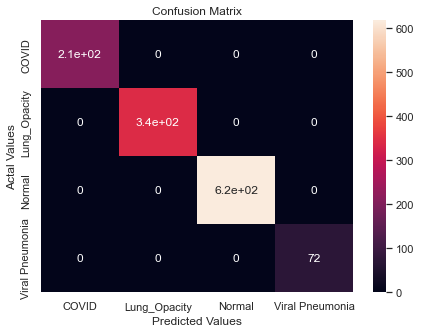

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       341
           2       1.00      1.00      1.00       617
           3       1.00      1.00      1.00        72

    accuracy                           1.00      1238
   macro avg       1.00      1.00      1.00      1238
weighted avg       1.00      1.00      1.00      1238



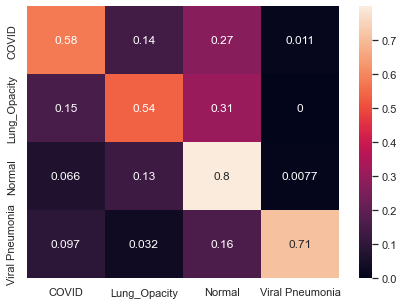

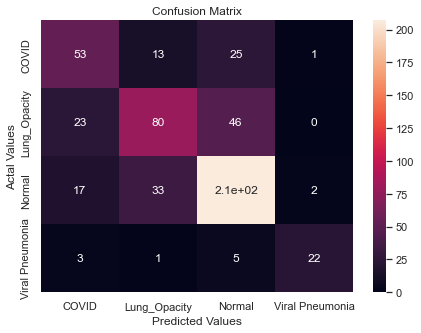

              precision    recall  f1-score   support

           0       0.55      0.58      0.56        92
           1       0.63      0.54      0.58       149
           2       0.73      0.80      0.76       259
           3       0.88      0.71      0.79        31

    accuracy                           0.68       531
   macro avg       0.70      0.66      0.67       531
weighted avg       0.68      0.68      0.68       531



In [23]:
plot_loss_accuracy_curve(history)

#Performance no horizonte de treino

plot_confusion_matrix(X_tr,y_tr,model)

plot_confusion_matrix(X_val,y_val,model)

# Salvando nosso modelo 💾

### Processamento principal🔥

In [24]:
from tensorflow.keras.models import model_from_json
import glob

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    print("Modelo salvo com sucesso")
    
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
list_of_files = glob.glob('models/*')
latest_file = max(list_of_files, key=os.path.getctime)
try:
    model.load_weights(latest_file)
    print("Modelo carregado com sucesso")
    print(f"Peso carregado está no diretório {latest_file}")
    compile_model(model)
except:
    print('Verifique se existe histórico de treinamento para o modelo.')

Modelo salvo com sucesso
Modelo carregado com sucesso
Peso carregado está no diretório models\model50.h5


# Avaliando a performance do nosso modelo com imagens de teste 📈

### Funções Auxiliares 🧪

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    x = np.arange(0, 1.1, 0.1).tolist()
    y = x
    plt.plot(x,y)
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    


### Processamento principal🔥

98/98 [==============================] - 2s 20ms/step - loss: 3.3810 - accuracy: 0.6721
Acurácia do modelo para os dados do diretório de teste:  67.21%


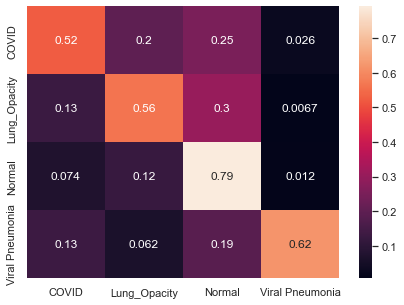

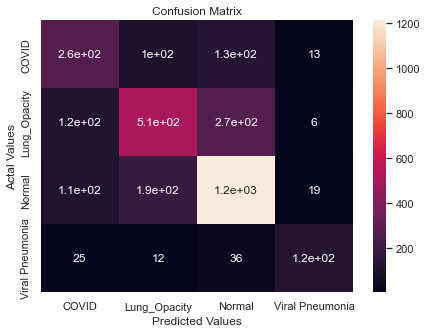

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       505
           1       0.63      0.56      0.59       899
           2       0.74      0.79      0.76      1530
           3       0.76      0.62      0.68       192

    accuracy                           0.67      3126
   macro avg       0.66      0.62      0.64      3126
weighted avg       0.67      0.67      0.67      3126

AUC for COVID is 0.8454980904423903.
AUC for Lung_Opacity is 0.8051567050751895.
AUC for Normal is 0.8277874015103116.
AUC for Viral Pneumonia is 0.954258442683481.


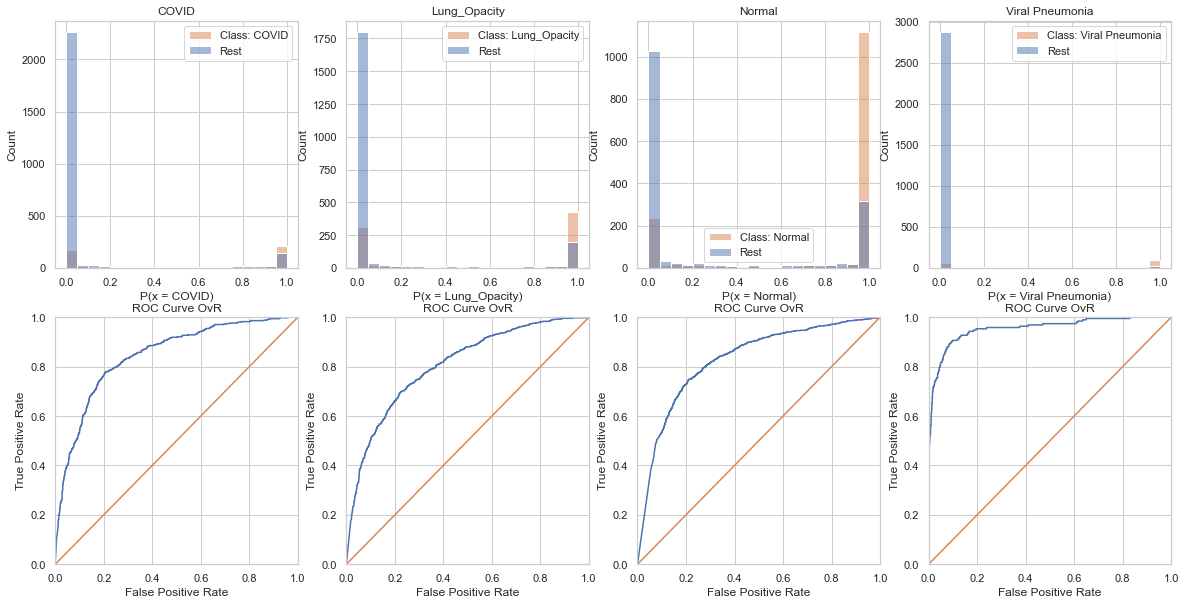

In [27]:
X_test=[]
Y_test=[]
for file in os.listdir('images/test'):
    if(file.endswith(".png")):
        im=Image.open('images/test/' + file)
        X_test.append(np.asarray(im))
        im_row=test_df[test_df['filename']==os.path.splitext(file)[0]].drop(columns="filename")
        Y_test.append(im_row.drop(columns='Disease').to_numpy()[0])
        
X_test=np.asarray(X_test)
X_test=X_test/255
Y_test=np.asarray(Y_test)

res = model.evaluate(X_test, Y_test, verbose = 1)

print(f'Acurácia do modelo para os dados do diretório de teste:  {res[1]*100:.2f}%')

plot_confusion_matrix(X_test,Y_test,model)

f, axs = plt.subplots(2,4,figsize=(20,10))
bins = [i/20 for i in range(20)] + [1]
classes = categories
roc_auc_ovr = {}
Y_pred=model.predict(X_test)

for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    df_aux=pd.DataFrame(Y_pred,columns=categories).join(test_df['Disease'])
    # Prepares an auxiliar dataframe to help with the plots
    df_aux["class"] = [1 if y == c else 0 for y in df_aux['Disease']]
    df_aux['prob'] = df_aux[c]

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax = plt.subplot(2, 4, i+5)
    fpr , tpr , thresholds = roc_curve (df_aux['class'], df_aux['prob'])
    plt.plot(fpr,tpr) 
    x = np.arange(0, 1.1, 0.1).tolist()
    y = x
    plt.plot(x,y)
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    ax.set_title("ROC Curve OvR")
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    print(f"AUC for {c} is {roc_auc_ovr[c]}.")
